In [1]:
"""
直立长方体重力梯度张量正演及添加噪声
"""
# 3rd imports
import matplotlib.pyplot as plt
# local imports
from geoist import gridder
from geoist.inversion import geometry
from geoist.pfm import prism, giutils
from geoist.vis import giplt


In [2]:
#模型设置
model = [geometry.Prism(-1000, 1000, -1000, 1000, 0, 2000, {'density': 1000})]
shape = (100, 100)
#观测设置
xp, yp, zp = gridder.regular((-5000, 5000, -5000, 5000), shape, z=-200)


In [3]:
#计算
components = [prism.gxx, prism.gxy, prism.gxz,
              prism.gyy, prism.gyz, prism.gzz]

Calculate the tensor components and contaminate with 5 Eotvos noise
Plotting...


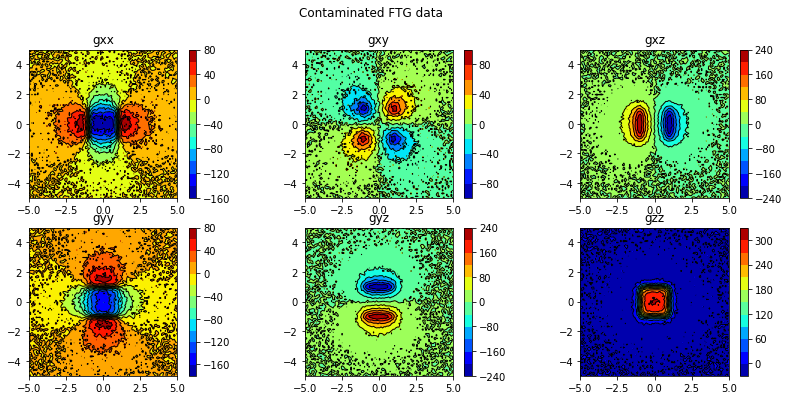

In [4]:
#添加噪声及成图
print("Calculate the tensor components and contaminate with 5 Eotvos noise")
ftg = [giutils.contaminate(comp(xp, yp, zp, model), 5.0) for comp in components]

print("Plotting...")
plt.figure(figsize=(14, 6))
plt.suptitle("Contaminated FTG data")
names = ['gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz']
for i, data in enumerate(ftg):
    plt.subplot(2, 3, i + 1)
    plt.title(names[i])
    plt.axis('scaled')
    levels = giplt.contourf(xp * 0.001, yp * 0.001, data, (100, 100), 12)
    plt.colorbar()
    giplt.contour(xp * 0.001, yp * 0.001, data, shape, levels, clabel=False)
plt.show()